In [1]:
from sympy import MatrixSymbol, Matrix

R = Matrix(MatrixSymbol("r", 3,3)).vec()
G = Matrix(MatrixSymbol("g", 3,3)).vec()
B = Matrix(MatrixSymbol("b", 3,3)).vec()
X = Matrix.vstack(R,G,B)


In [2]:
D1 = Matrix.zeros(6, 9)
for i in range(D1.shape[0]):
    D1[i, i] = 1
    D1[i, i+3] = -1
D1


Matrix([
[1, 0, 0, -1,  0,  0,  0,  0,  0],
[0, 1, 0,  0, -1,  0,  0,  0,  0],
[0, 0, 1,  0,  0, -1,  0,  0,  0],
[0, 0, 0,  1,  0,  0, -1,  0,  0],
[0, 0, 0,  0,  1,  0,  0, -1,  0],
[0, 0, 0,  0,  0,  1,  0,  0, -1]])

In [3]:
D2 = Matrix.zeros(6, 9)
n = 0
for i in range(D1.shape[0]):
    if (i+n+1)%3 == 0: n+=1
    D2[i, i+n] = 1
    D2[i, i+n+1] = -1
D2


Matrix([
[1, -1,  0, 0,  0,  0, 0,  0,  0],
[0,  1, -1, 0,  0,  0, 0,  0,  0],
[0,  0,  0, 1, -1,  0, 0,  0,  0],
[0,  0,  0, 0,  1, -1, 0,  0,  0],
[0,  0,  0, 0,  0,  0, 1, -1,  0],
[0,  0,  0, 0,  0,  0, 0,  1, -1]])

Interesting part coming in. Let's design some weired matrices.

In [4]:
I = Matrix.eye(9,9); zero = Matrix.zeros(9,9)
r_v = Matrix.hstack(I, zero, zero)
g_v = Matrix.hstack(zero, I, zero)
b_v = Matrix.hstack(zero, zero, I)

r_v
# this matrix can help to build up the matrix D


Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [5]:
X.T*b_v.T


Matrix([[b[0, 0], b[1, 0], b[2, 0], b[0, 1], b[1, 1], b[2, 1], b[0, 2], b[1, 2], b[2, 2]]])

In [6]:
# divide and conquer!
(X.T*r_v.T*D1.T)*(D1*r_v*X) + (X.T*r_v.T*D2.T)*(D2*r_v*X) +\
    (X.T*g_v.T*D1.T)*(D1*g_v*X) + (X.T*g_v.T*D2.T)*(D2*g_v*X) + \
        (X.T*b_v.T*D1.T)*(D1*b_v*X) + (X.T*b_v.T*D2.T)*(D2*b_v*X)


Matrix([[(b[0, 0] - b[0, 1])**2 + (b[0, 0] - b[1, 0])**2 + (b[0, 1] - b[0, 2])**2 + (b[0, 1] - b[1, 1])**2 + (b[0, 2] - b[1, 2])**2 + (b[1, 0] - b[1, 1])**2 + (b[1, 0] - b[2, 0])**2 + (b[1, 1] - b[1, 2])**2 + (b[1, 1] - b[2, 1])**2 + (b[1, 2] - b[2, 2])**2 + (b[2, 0] - b[2, 1])**2 + (b[2, 1] - b[2, 2])**2 + (g[0, 0] - g[0, 1])**2 + (g[0, 0] - g[1, 0])**2 + (g[0, 1] - g[0, 2])**2 + (g[0, 1] - g[1, 1])**2 + (g[0, 2] - g[1, 2])**2 + (g[1, 0] - g[1, 1])**2 + (g[1, 0] - g[2, 0])**2 + (g[1, 1] - g[1, 2])**2 + (g[1, 1] - g[2, 1])**2 + (g[1, 2] - g[2, 2])**2 + (g[2, 0] - g[2, 1])**2 + (g[2, 1] - g[2, 2])**2 + (r[0, 0] - r[0, 1])**2 + (r[0, 0] - r[1, 0])**2 + (r[0, 1] - r[0, 2])**2 + (r[0, 1] - r[1, 1])**2 + (r[0, 2] - r[1, 2])**2 + (r[1, 0] - r[1, 1])**2 + (r[1, 0] - r[2, 0])**2 + (r[1, 1] - r[1, 2])**2 + (r[1, 1] - r[2, 1])**2 + (r[1, 2] - r[2, 2])**2 + (r[2, 0] - r[2, 1])**2 + (r[2, 1] - r[2, 2])**2]])

# Here come the real deal

In [7]:
# program taken from https://stanford.edu/~boyd/cvxbook/cvxbook_additional_exercises/
# ...and slightly adapted

# Also look at the description of exercise 22 on the exercise sheet!

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from cvxopt import matrix, solvers


In [8]:
# an auxiliary function interpreting three given arrays as red/green/blue values
# and showing the resulting image
def show_img(R,G,B):
  img = np.stack((np.array(R),np.array(G),np.array(B)), axis=2)
  # turn off ticks and labels of the figure
  plt.tick_params(
    axis='both', which='both', labelleft='off', labelbottom='off',
    bottom='off', top='off', right='off', left='off'
  )
  fig = plt.imshow(img)


In [9]:
#read image
img = mpimg.imread("flower.png")
img = img[:,:,0:3]  # img is a triple of matrices, storing the intensity values for red, green and blue
m,n,_ = img.shape

# make into greyscale image
M = 0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2]

# record some color values which we will assume as known later for reconstruction
np.random.seed(0)
known_ind = np.where(np.random.rand(m,n) >= 0.90)
R_known = img[:,:,0]
G_known = img[:,:,1]
B_known = img[:,:,2]
R_known = R_known[known_ind]
G_known = G_known[known_ind]
B_known = B_known[known_ind]


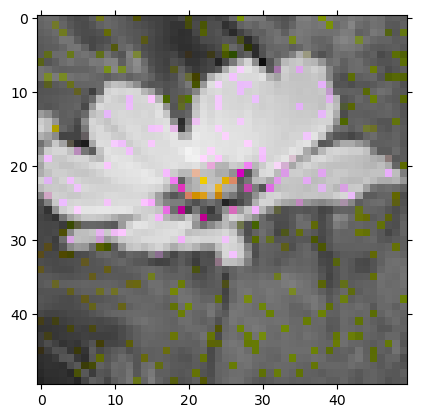

In [10]:
# sprinkle the greyscale picture with the pixels of known color
R_given = np.copy(M);
R_given[known_ind] = R_known;
G_given = np.copy(M);
G_given[known_ind] = G_known;
B_given = np.copy(M);
B_given[known_ind] = B_known;

# show the picture that we are starting with for our reconstruction task
show_img(R_given, G_given, B_given)


In [11]:
n = M.shape[0]

# 2*3 = 6, 3*3 = 9
D1 = np.zeros(((n-1)*n, n*n))
for i in range(D1.shape[0]):
    D1[i, i] = 1
    D1[i, i+n] = -1

D2 = np.zeros(((n-1)*n, n*n))
jump = 0
for i in range(D2.shape[0]):
    if (i+jump+1)%n == 0: jump+=1
    D2[i, i+jump] = 1
    D2[i, i+jump+1] = -1

I = np.eye(n*n); zero = np.zeros((n*n, n*n))

r_v = np.hstack((I, zero, zero))
g_v = np.hstack((zero, I, zero))
b_v = np.hstack((zero, zero, I))

r_v.T@(D1.T@D1 + D2.T@D2)@r_v + g_v.T@(D1.T@D1 + D2.T@D2)@g_v + b_v.T@(D1.T@D1 + D2.T@D2)@b_v


array([[ 2., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  3., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  3., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  3., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

In [14]:
indices = np.ravel_multi_index(known_ind, (n,n))


In [15]:
#------------your task starts here-----------------------------

# set up the matrices and vectors to feed into cvxopt.solvers.qp
# the names are chosen as in the API here:
#  http://cvxopt.org/userguide/coneprog.html#quadratic-programming


# these give the 'objective function' that needs to be minimized
P= r_v.T@(D1.T@D1 + D2.T@D2)@r_v + g_v.T@(D1.T@D1 + D2.T@D2)@g_v + b_v.T@(D1.T@D1 + D2.T@D2)@b_v
q= np.zeros(3*n*n)

# these give the inequality constraints -- brightness values should be between 0 and 1
G= np.vstack((np.eye(3*n*n), -np.eye(3*n*n)))
h= np.hstack((np.ones(3*n*n), np.zeros(3*n*n)))

# these give the equality constraints --
#     1. some colours are known and
#     2. our known greyscale value M_ij = 0.299*red_ij + 0.587*green_ij + 0.114*blue_ij
A= np.vstack((r_v[indices], g_v[indices], b_v[indices], \
    np.delete((0.299*r_v+0.587*g_v+0.114*b_v), indices, axis=0)))
b= np.hstack((R_known, G_known, B_known, np.delete(M.reshape(1,-1).squeeze(), indices))).astype(np.double)

#the cvxopt package has its own matrix class - this is what you need to feed into the qp solver
my_P=matrix(P)
my_q=matrix(q)
my_G=matrix(G)
my_h=matrix(h)
my_A=matrix(A)
my_b=matrix(b)


In [16]:
# this is where the optimization problem is solved:
sol = solvers.qp(my_P,my_q,my_G,my_h,my_A,my_b)
# 'sol' is now a dictionary with several kinds of information
# the actual solution vector of values r_{ij}, g_{ij}, b_{ij} is the following:
x = sol['x']


     pcost       dcost       gap    pres   dres
 0:  1.0040e+02 -1.1206e+04  4e+04  2e+00  1e-13
 1:  1.0529e+02 -5.6206e+03  7e+03  1e-01  3e-14
 2:  8.9244e+01 -5.0466e+02  6e+02  6e-03  4e-14
 3:  6.8955e+01 -6.3888e+01  1e+02  1e-03  2e-14
 4:  6.2662e+01  1.5253e+01  5e+01  3e-04  2e-14
 5:  6.0560e+01  4.9716e+01  1e+01  3e-06  2e-14
 6:  6.0302e+01  5.8800e+01  2e+00  4e-07  2e-14
 7:  6.0277e+01  6.0017e+01  3e-01  5e-08  3e-14
 8:  6.0275e+01  6.0247e+01  3e-02  5e-09  4e-14
 9:  6.0275e+01  6.0274e+01  8e-04  1e-10  3e-14
10:  6.0275e+01  6.0275e+01  2e-05  2e-12  3e-14
Optimal solution found.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


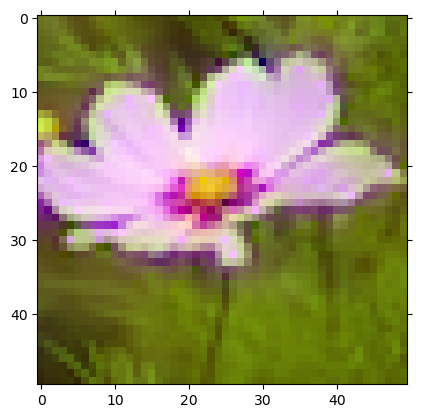

In [17]:

# now repackage this solution vector into 3 matrices of size 50x50 encoding the red/green/blue values
R_reconstructed= (r_v@x).reshape((n,n))
G_reconstructed= (g_v@x).reshape((n,n))
B_reconstructed= (b_v@x).reshape((n,n))

# see what we have got
show_img(R_reconstructed, G_reconstructed, B_reconstructed)
